In [7]:
%matplotlib inline
# Importing standard Qiskit libraries
import qiskit as q
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from iqx import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-12-20 16:38:01,397: Credentials are already in use. The existing account in the session will be replaced.


In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.ry(pi/2, qreg_q[0])
circuit.ry(pi/2, qreg_q[1])
circuit.ry(pi/2, qreg_q[2])
circuit.ry(pi/2, qreg_q[3])
circuit.cry(pi/2, qreg_q[2], qreg_q[3])
circuit.cry(pi/2, qreg_q[1], qreg_q[2])
circuit.ry(pi/2, qreg_q[3])
circuit.cry(pi/2, qreg_q[0], qreg_q[1])
circuit.cry(pi/2, qreg_q[2], qreg_q[3])
circuit.ry(pi/2, qreg_q[0])
circuit.ry(pi/2, qreg_q[2])
circuit.ry(pi/2, qreg_q[3])
circuit.cry(pi/2, qreg_q[2], qreg_q[3])
circuit.cry(pi/2, qreg_q[1], qreg_q[2])
circuit.ry(pi/2, qreg_q[3])
circuit.ry(pi/2, qreg_q[1])
circuit.ry(pi/2, qreg_q[2])
circuit.measure(qreg_q[3], creg_c[3])
circuit.cry(pi/2, qreg_q[1], qreg_q[2])
circuit.cry(pi/2, qreg_q[0], qreg_q[1])
circuit.ry(pi/2, qreg_q[2])
circuit.ry(pi/2, qreg_q[0])
circuit.ry(pi/2, qreg_q[1])
circuit.measure(qreg_q[2], creg_c[2])
circuit.cry(pi/2, qreg_q[0], qreg_q[1])
circuit.ry(pi/2, qreg_q[0])
circuit.ry(pi/2, qreg_q[1])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[0], creg_c[0])

editor = CircuitComposer(circuit=circuit)
editor

CircuitComposer(circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7fc5a276c550>)

In [4]:
provider #Check the name of the current provider

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [5]:
provider = IBMQ.get_provider('ibm-q') #Code to determine the avaiability of quantum machines including simulator on the IBM quantum cloud
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = 'simulator'
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits") 

ibmq_qasm_simulator has 34 queued and simulator qubits
ibmqx2 has 4 queued and 5 qubits
ibmq_16_melbourne has 2950 queued and 15 qubits
ibmq_vigo has 0 queued and 5 qubits
ibmq_ourense has 0 queued and 5 qubits
ibmq_valencia has 1 queued and 5 qubits
ibmq_armonk has 3 queued and 1 qubits
ibmq_athens has 12 queued and 5 qubits
ibmq_santiago has 19 queued and 5 qubits


In [8]:
from qiskit.tools.monitor import job_monitor #Code to create a job, choose a backend, and execute 

backend = provider.get_backend('ibmq_vigo')

job = q.execute(circuit, backend=backend, shots=500) #500 attempts to measure value and determine probabilities (collapses each time due to superposition)

job_monitor(job)

Job Status: job has successfully run


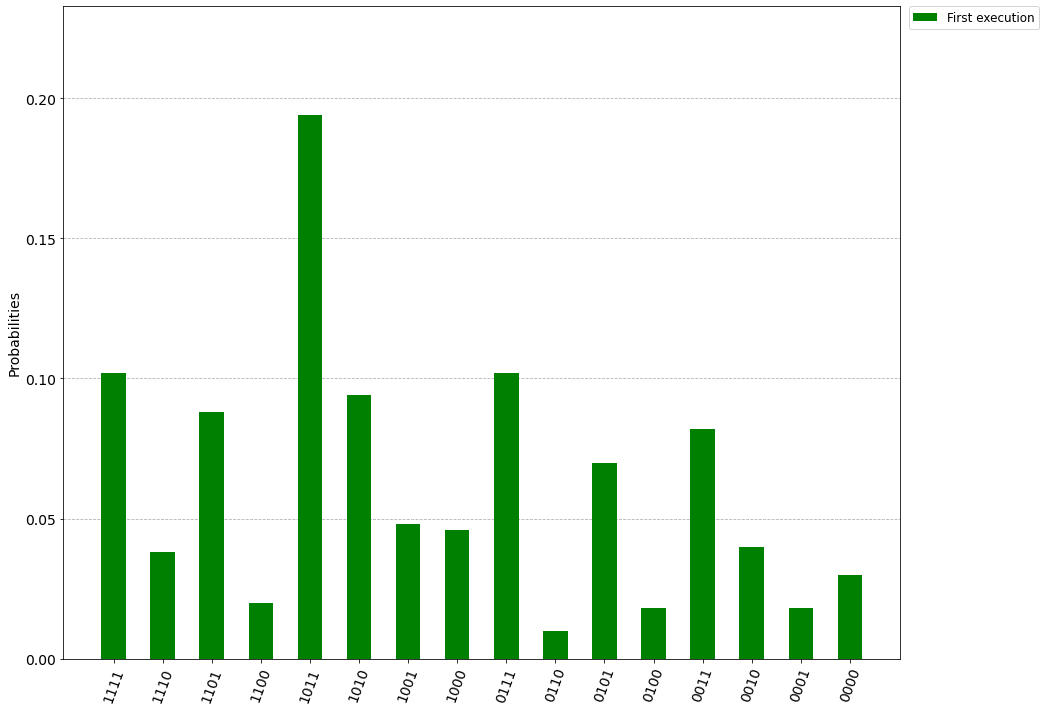

In [10]:
from qiskit.visualization import plot_histogram #Plot histogram of probabilities based on the pre-defined job 
from matplotlib import style


#style.use('dark background')

result = job.result()

counts = result.get_counts(circuit)

#plot_histogram([counts])
legend = ['First execution']
plot_histogram([counts], legend=legend, sort='desc', figsize=(15,12),
               color=['green'], bar_labels=False)



In [12]:
from qiskit import Aer #Simulator framework for qiskit
from qiskit.visualization import plot_state_city, plot_bloch_multivector #Import various modules to view the quantum state using the
# statevector simulator 
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere

backend = Aer.get_backend('statevector_simulator')

result = job.result()



result = execute(circuit, backend).result()
a_25_RY  = result.get_statevector(circuit)

#plot_histogram([counts])

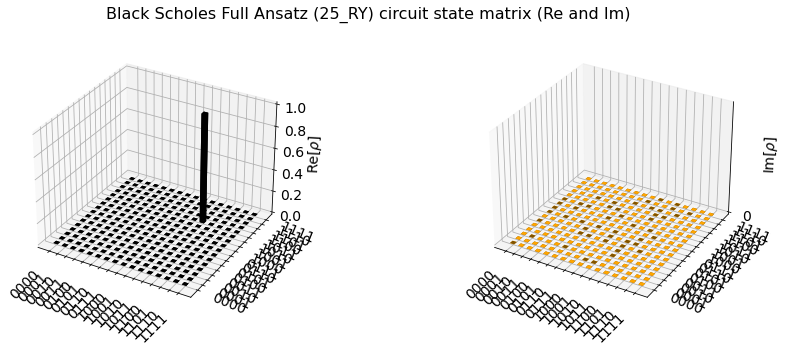

In [14]:
plot_state_city(a_25_RY, title="Black Scholes Full Ansatz (25_RY) circuit state matrix (Re and Im)", color=['black', 'orange'])

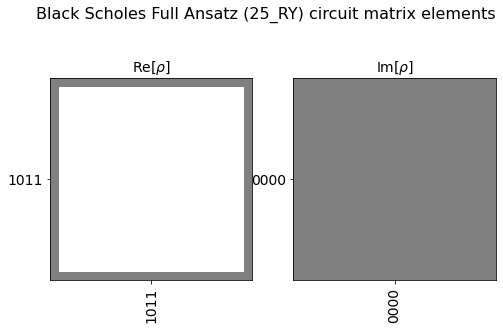

In [16]:
plot_state_hinton(a_25_RY, title="Black Scholes Full Ansatz (25_RY) circuit matrix elements")

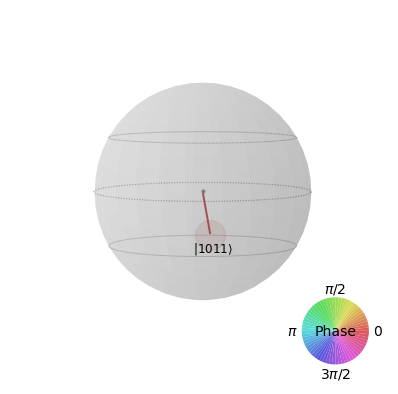

In [17]:
plot_state_qsphere(a_25_RY)

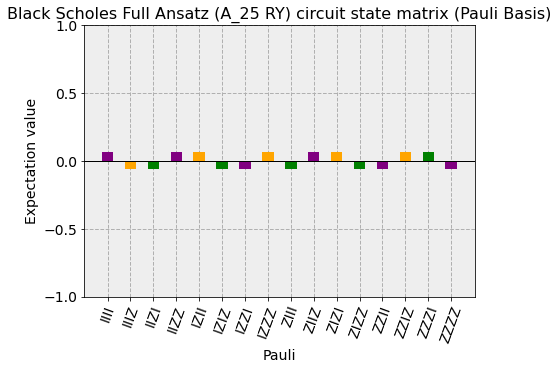

In [19]:
plot_state_paulivec(a_25_RY, title="Black Scholes Full Ansatz (A_25 RY) circuit state matrix (Pauli Basis)", color=['purple', 'orange', 'green'])

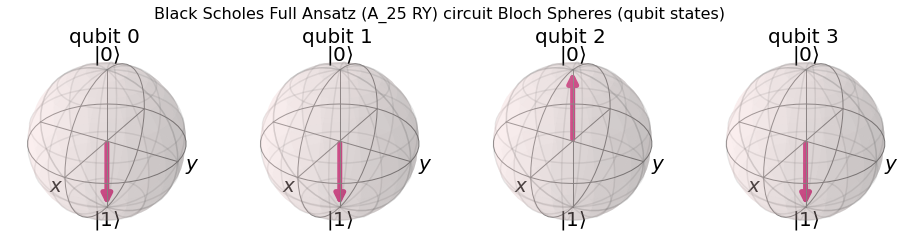

In [20]:
plot_bloch_multivector(a_25_RY, title="Black Scholes Full Ansatz (A_25 RY) circuit Bloch Spheres (qubit states)")